# Import packages and data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import highspy

In [11]:
wind_farm_size = 80   # MW (wind farm installed capacity)
max_import_export_power = wind_farm_size * 0.25   # MW (max import/export limit)

# Wind profile

wind_power_time_series = pd.read_csv("/Users/tilde/OneDrive/Desktop/EG2340/Vestas_production_2024_8760.csv")["Vestas production"].astype(float)

# Scaled
load_profile = pd.read_csv(
    "/Users/tilde/OneDrive/Desktop/EG2340/Load_profile.csv"
)
load_time_series = load_profile.loc[:, "Load Profile"].astype(float) * wind_farm_size * 1.2

# Solar profile 
solar_profile = pd.read_csv(
    "/Users/tilde/OneDrive/Desktop/EG2340/Solar_profile.csv"
)
solar_time_series = solar_profile.loc[:, "Solar profile"].astype(float) * wind_farm_size * 0.5

# Prices 
prices = pd.read_csv(
    "/Users/tilde/OneDrive/Desktop/EG2340/Prices_clean.csv"
)
fiktiv_price = prices.loc[:, "Price"].astype(float)

T_simulation = len(load_time_series)

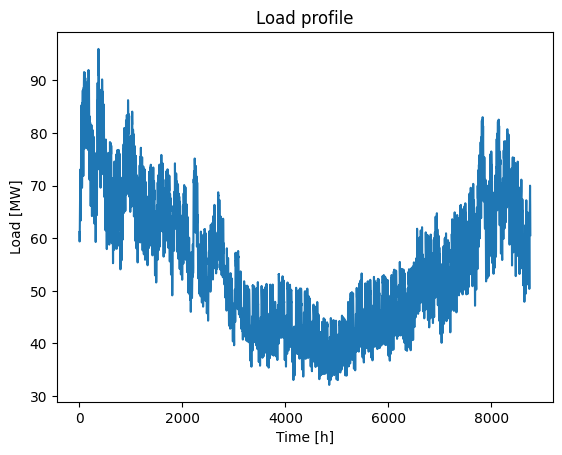

In [12]:
plt.plot(load_time_series)
plt.title("Load profile")
plt.xlabel("Time [h]")
plt.ylabel("Load [MW]")
plt.show()

<Axes: >

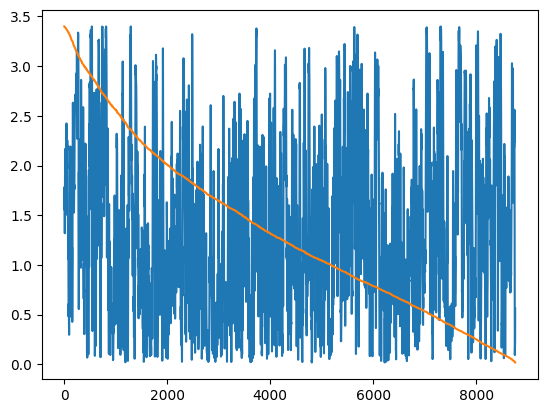

In [13]:
wind_power_time_series.plot()
wind_power_time_series.sort_values(ascending=False).reset_index(drop=True).plot()

# Generate the model 

In [ ]:
# General model settings
model = highspy.Highs()
# Parameters

start_storage_percentage = 0.5 #  # Starting storage level, 0.5 = 50% of max storage
storage_cost_per_MWh = 300000  # Storage cost per MWh, try to find a good value


Maximum_storage = 40
Minimum_storage = 0.1*40
End_storage = Minimum_storage

# Define variables
max_storage   = model.addVariable(...) # Maximum storage 
min_storage   = model.addVariable(...) # Minimum storage 
end_storage = model.addVariable(...)  # End storage variable

for t in range(T_simulation): 
    ...


# Define constraints:

# Power balance:
for t in range(T_simulation): 
    model.addConstr(...)
# Limit storage:
    model.addConstr(...)
    model.addConstr(...)
# Storage balance: 
    if t == 0:
        model.addConstr(...)
    else:
        model.addConstr(...)

# End storage constraint:
model.addConstr(...)

First objective: maximize win without BESS

In [ ]:

# Objective function:
model.changeObjectiveSense(highspy.ObjSense.kMaximize)

total_revenue = 0
for t in range(T_simulation):
    total_revenue += price[t] * power_output[t]

model.setObjective(total_revenue)
model.run()
# If you want to see the progress of the solver uncomment the following 2 lines:
model.setOptionValue("log_file", "highs_log.txt")  # Set log file path
model.setOptionValue("output_flag", True)          # Enable solver output

# Check if optimal solution was found

if model.getModelStatus() ==highspy.HighsModelStatus.kOptimal:
    print("Optimal solution found.")
    solution = model.getSolution()
    ...
else:
    print("No optimal solution found.")

Second objective: maximize win with BESS

In [ ]:
model.changeObjectiveSense(highspy.ObjSense.kMaximize)

model.setObjective(...)
model.run()

# Check if optimal solution was found

if model.getModelStatus() ==highspy.HighsModelStatus.kOptimal:
    print("Optimal solution found.")
    solution = model.getSolution()
    ...
else:
    print("No optimal solution found.")

Third Objective: minimize curtailment

In [ ]:

model.changeObjectiveSense(highspy.ObjSense.kMinimize)

model.setObjective(...)
model.run()

# Check if optimal solution was found

if model.getModelStatus() ==highspy.HighsModelStatus.kOptimal:
    print("Optimal solution found.")
    solution = model.getSolution()
    ...
else:
    print("No optimal solution found.")